In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1.2)

In [2]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor")

In [3]:
poiFile = "sequences_pois_parquet_v2/export_sequences_pois/part-00000-tid-4596063796522811359-bb926764-6871-4a35-9587-8e511f4e93db-20012-1-c000.snappy.parquet"

pois = pd.read_parquet(poiFile)

In [4]:
pois

,name1_fs,name2_fs,stop_type,POIId
0,Shop & Service,Food & Drink Shop,poi,0
1,Food,Fast Food Restaurant,poi,1
2,Shop & Service,Department Store,poi,2
3,Shop & Service,Print Shop,poi,3
4,Shop & Service,Food & Drink Shop,poi,4
...,...,...,...,...
103964,Professional & Other Places,Industrial Estate,poi,1657857376754
103965,Professional & Other Places,Spiritual Center,poi,1657857376755
103966,Shop & Service,Sporting Goods Shop,poi,1657857376756
103967,Professional & Other Places,Industrial Estate,poi,1657857376757


In [5]:
#load all files with users
file0 = "sequences_pois_parquet_v2/export_sequences_stops/part-00000-tid-8136314838844788508-c9e46881-7236-48b7-88a3-23384abe293d-20709-1-c000.snappy.parquet"
file1 = "sequences_pois_parquet_v2/export_sequences_stops/part-00001-tid-8136314838844788508-c9e46881-7236-48b7-88a3-23384abe293d-20710-1-c000.snappy.parquet"
file2 = "sequences_pois_parquet_v2/export_sequences_stops/part-00002-tid-8136314838844788508-c9e46881-7236-48b7-88a3-23384abe293d-20711-1-c000.snappy.parquet"
file3 = "sequences_pois_parquet_v2/export_sequences_stops/part-00003-tid-8136314838844788508-c9e46881-7236-48b7-88a3-23384abe293d-20712-1-c000.snappy.parquet"
file4 = "sequences_pois_parquet_v2/export_sequences_stops/part-00004-tid-8136314838844788508-c9e46881-7236-48b7-88a3-23384abe293d-20713-1-c000.snappy.parquet"
file5 = "sequences_pois_parquet_v2/export_sequences_stops/part-00005-tid-8136314838844788508-c9e46881-7236-48b7-88a3-23384abe293d-20714-1-c000.snappy.parquet"
file6 = "sequences_pois_parquet_v2/export_sequences_stops/part-00006-tid-8136314838844788508-c9e46881-7236-48b7-88a3-23384abe293d-20715-1-c000.snappy.parquet"
file7 = "sequences_pois_parquet_v2/export_sequences_stops/part-00007-tid-8136314838844788508-c9e46881-7236-48b7-88a3-23384abe293d-20716-1-c000.snappy.parquet"
file8 = "sequences_pois_parquet_v2/export_sequences_stops/part-00008-tid-8136314838844788508-c9e46881-7236-48b7-88a3-23384abe293d-20717-1-c000.snappy.parquet"
file9 = "sequences_pois_parquet_v2/export_sequences_stops/part-00009-tid-8136314838844788508-c9e46881-7236-48b7-88a3-23384abe293d-20718-1-c000.snappy.parquet"


stops0 = pd.read_parquet(file0)
stops1 = pd.read_parquet(file1)
stops2 = pd.read_parquet(file2)
stops3 = pd.read_parquet(file3)
stops4 = pd.read_parquet(file4)
stops5 = pd.read_parquet(file5)
stops6 = pd.read_parquet(file6)
stops7 = pd.read_parquet(file7)
stops8 = pd.read_parquet(file8)
stops9 = pd.read_parquet(file9)

In [6]:
#all stop files are merged
data = pd.concat([stops0, stops1, stops2, stops3, stops4, stops5, stops6, stops7, stops8, stops9]) 
data

,userId,incrementalId,POIId,weekday,hour,minutes_spent,stop_type
0,137438954199,12,NaN,3,0,9.800000,other
1,25769804195,228,2.319282e+11,3,18,19.266667,poi
2,231928234965,203,NaN,2,11,59.216667,work
3,85899346277,49,NaN,5,16,1400.000000,home
4,17179871077,139,1.082332e+12,7,17,40.800000,poi
...,...,...,...,...,...,...,...
2033415,283467841986,546,3.092376e+11,3,12,11.550000,poi
2033416,188978561523,81,NaN,4,17,870.183333,home
2033417,154618823885,300,NaN,1,12,208.083333,work
2033418,300647711754,288,NaN,6,15,126.116667,home


In [7]:
#merge stop files with POI-file
df = pd.merge(data, pois, how = "left", on=["POIId"]).drop(columns=['stop_type_y']).rename(columns={'stop_type_x': 'stop_type'}).sort_values(['userId', 'incrementalId'])
df

,userId,incrementalId,POIId,weekday,hour,minutes_spent,stop_type,name1_fs,name2_fs
13619480,0,1,NaN,4,0,1881.216667,home,NaN,NaN
11568080,0,2,NaN,5,8,40.400000,other,NaN,NaN
1369253,0,3,1.202591e+12,5,10,77.350000,poi,Shop & Service,Tailor Shop
13600030,0,4,NaN,5,11,376.450000,home,NaN,NaN
2208921,0,5,1.202591e+12,5,18,5.216667,poi,Shop & Service,Tailor Shop
...,...,...,...,...,...,...,...,...,...
65798,403726927924,1,NaN,5,9,290770.700000,home,NaN,NaN
13053522,403726927925,1,NaN,1,13,19.683333,other,NaN,NaN
3577517,403726927925,2,5.669357e+11,1,16,9.916667,poi,Shop & Service,Gas Station
4139127,403726927926,1,NaN,1,18,289221.900000,work,NaN,NaN


In [8]:
#all is poi
pois.stop_type.unique().tolist()

['poi']

In [9]:
#number of uniqe POI ID
len(pois.POIId.unique())

103969

In [10]:
#POI categories
poi_grouping = pois.name1_fs.unique().tolist()
poi_grouping

['Shop & Service',
 'Food',
 'Arts & Entertainment',
 'Professional & Other Places',
 'Outdoors & Recreation',
 'College & University',
 'Travel & Transport',
 'Nightlife Spot']

In [11]:
#poi sub categories
poi_type = pois.name2_fs.unique().tolist()

#number of poi sub categories
len(poi_type)

169

In [12]:
poi1Count = pois.groupby('name1_fs').count().reset_index().sort_values(by='POIId', ascending=False)
poi1Count

,name1_fs,name2_fs,stop_type,POIId
6,Shop & Service,27481,27481,27481
5,Professional & Other Places,26505,26505,26505
4,Outdoors & Recreation,22557,22557,22557
2,Food,17664,17664,17664
7,Travel & Transport,3810,3810,3810
0,Arts & Entertainment,2606,2606,2606
3,Nightlife Spot,2110,2110,2110
1,College & University,1236,1236,1236


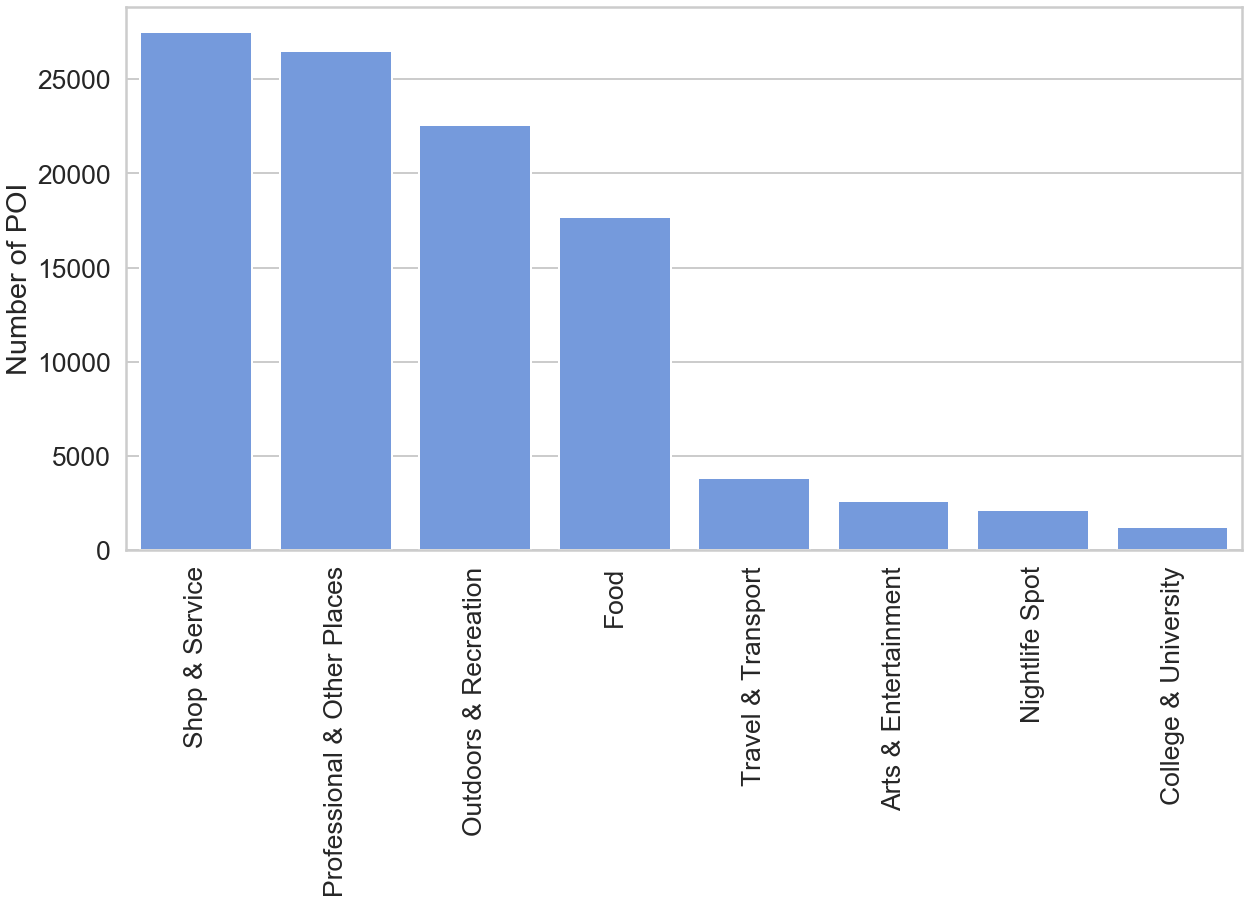

In [13]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/Plots")

#plot of number of POI's - category
ax = sns.barplot(x = 'name1_fs', y = 'POIId', data=poi1Count, color = 'cornflowerblue')
ax.set(xlabel=None)
plt.xticks(rotation=90)
ax.set_ylabel("Number of POI")
plt.savefig('pois1.png',bbox_inches='tight')
plt.show()

In [14]:
poi_grouping

['Shop & Service',
 'Food',
 'Arts & Entertainment',
 'Professional & Other Places',
 'Outdoors & Recreation',
 'College & University',
 'Travel & Transport',
 'Nightlife Spot']

In [15]:
p2Count = pois.groupby(['name1_fs', 'name2_fs']).count().reset_index()

In [16]:
#count of subcategories
poi2 = np.zeros(len(poi_grouping))
for i in poi_grouping:
    poi2[poi_grouping.index(i)] = len(p2Count[p2Count['name1_fs'] == str(i)])

In [17]:
#df with categories
dfPOI2 = pd.DataFrame(poi_grouping, columns = ['name1_fs'])

In [18]:
#add number of subcategories
dfPOI2['n_subCats'] = poi2

In [19]:
#sort by value of nubmer of subcategories
dfpoi2 = dfPOI2.sort_values(by='n_subCats', ascending=False)

In [20]:
dfpoi2

,name1_fs,n_subCats
0,Shop & Service,88.0
3,Professional & Other Places,24.0
4,Outdoors & Recreation,18.0
2,Arts & Entertainment,13.0
6,Travel & Transport,11.0
1,Food,9.0
7,Nightlife Spot,4.0
5,College & University,2.0


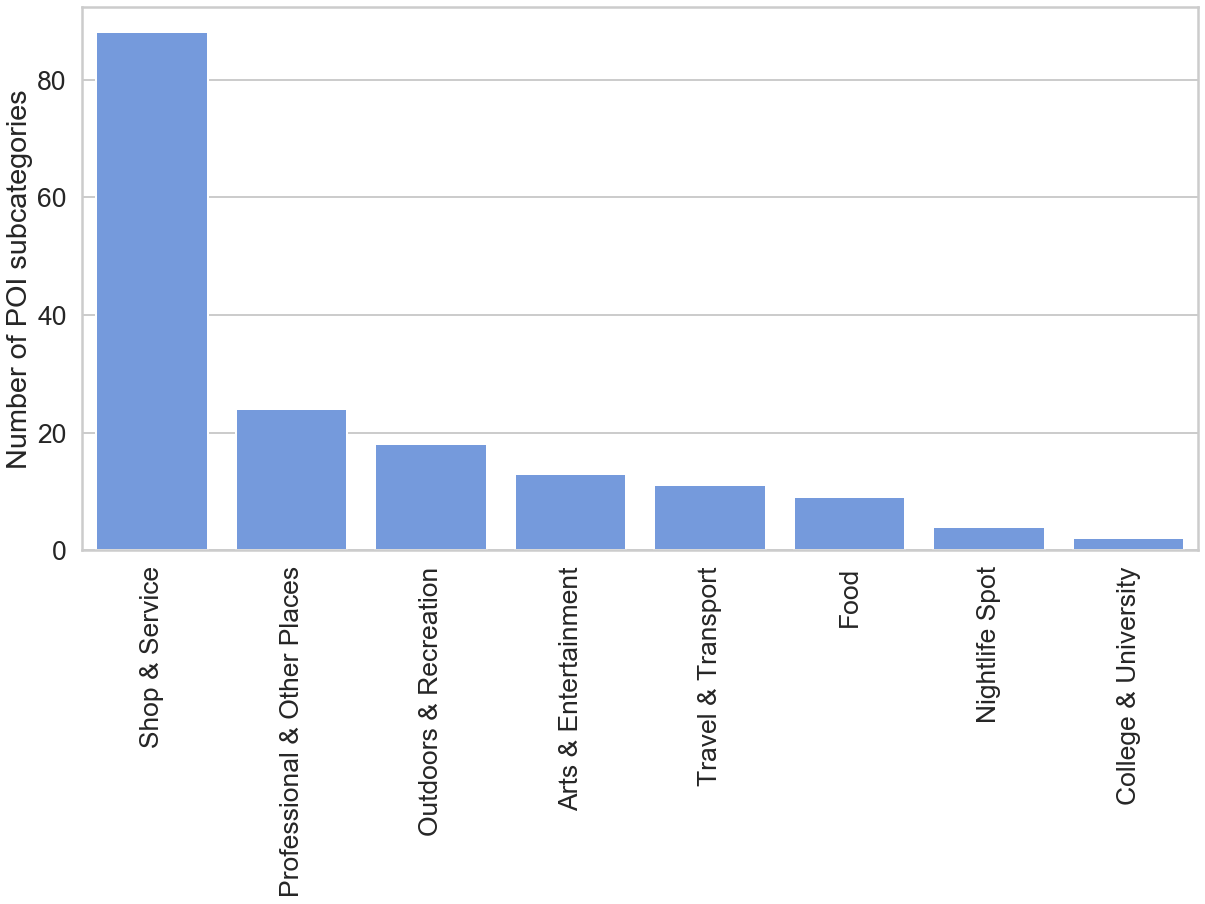

In [21]:
#plot - number of POI subcategories
ax = sns.barplot(x = 'name1_fs', y = 'n_subCats', data=dfpoi2, color = 'cornflowerblue')
ax.set(xlabel=None)
plt.xticks(rotation=90)
ax.set_ylabel("Number of POI subcategories")
plt.savefig('pois2.png',bbox_inches='tight')
plt.show()

In [22]:
#users
users = df['userId'].unique().tolist()
len(users)

99141

In [23]:
#number of stops for each user
stop = df.groupby(['userId']).count()['incrementalId'].reset_index()

In [24]:
#users with less than 60 stops
minStop = 60
fewStop = stop[stop.incrementalId < minStop]

In [25]:
#number of users to remove
print(len(fewStop))

5928


In [26]:
#copy of the original dataframe
dfBeforeFilter = df.copy()

In [27]:
#df witout the users that should be deleted
df = df[~df.userId.isin(fewStop['userId'])]

In [28]:
df

,userId,incrementalId,POIId,weekday,hour,minutes_spent,stop_type,name1_fs,name2_fs
13619480,0,1,NaN,4,0,1881.216667,home,NaN,NaN
11568080,0,2,NaN,5,8,40.400000,other,NaN,NaN
1369253,0,3,1.202591e+12,5,10,77.350000,poi,Shop & Service,Tailor Shop
13600030,0,4,NaN,5,11,376.450000,home,NaN,NaN
2208921,0,5,1.202591e+12,5,18,5.216667,poi,Shop & Service,Tailor Shop
...,...,...,...,...,...,...,...,...,...
11283706,403726927905,61,NaN,6,8,5.083333,home,NaN,NaN
4310212,403726927905,62,1.537598e+12,6,9,63.316667,poi,Professional & Other Places,School
13047585,403726927905,63,NaN,6,11,233.016667,home,NaN,NaN
3577384,403726927905,64,NaN,6,18,1609.166667,home,NaN,NaN


In [29]:
#length of the new users 
users =  df['userId'].unique().tolist()
len(users)

93213

In [30]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor")

In [31]:
#save dataframe
df.to_csv('dfData.csv', index=False)

In [32]:
#save the poi sub categories as csv
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/CSV files")

poiNames = pd.DataFrame(data=poi_type).rename(columns={0: "StopName"})
poiNames.to_csv('POInames.csv', index=False)